# African Countries GDP data visualization

### Importing libraries

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Importing the dataset

In [54]:
data = pd.read_csv('Data_Africa.csv')

### Data exploration

In [55]:
data.shape

(1334, 6)

In [56]:
data.head()

,ID,Year,Country,Continent,Population,GDP (USD)
0,1,2000,Uganda,East Africa,23303189,6.193247e+09
1,2,2001,Uganda,East Africa,24022603,5.840504e+09
2,3,2002,Uganda,East Africa,24781316,5.840504e+09
3,4,2003,Uganda,East Africa,25577246,6.606884e+09
4,5,2004,Uganda,East Africa,26403221,7.939488e+09


In [57]:
data.describe()

,ID,Year,Population,GDP (USD)
count,1334.00000,1334.000000,1.334000e+03,1.179000e+03
mean,667.50000,2011.000000,1.843945e+07,3.622274e+10
std,385.23694,6.635737,2.821587e+07,7.842724e+10
min,1.00000,2000.000000,5.144000e+03,7.595113e+07
25%,334.25000,2005.000000,1.868256e+06,2.934893e+09
50%,667.50000,2011.000000,9.688700e+06,1.022490e+10
75%,1000.75000,2017.000000,2.183554e+07,2.710397e+10
max,1334.00000,2022.000000,2.145687e+08,5.741838e+11


In [58]:
data.dtypes

ID               int64
Year             int64
Country         object
Continent       object
Population       int64
GDP (USD)      float64
dtype: object

In [98]:
data['Country'].nunique()

53

##### Checking for Nan values and for duplicates

In [59]:
data.isna().sum()

ID               0
Year             0
Country          0
Continent        0
Population       0
GDP (USD)      155
dtype: int64

In [60]:
data.duplicated().sum()

0

### Clearing Data

##### Creating a column to display the GDP in billions of USD

In [61]:
data["gdp_billions"] = data["GDP (USD)"]/1000000000

##### Dropping Nan values

In [62]:
data = data.dropna()

### Visualizing the data

##### Visualizing the top countries for GDP in the year 2000 and in the 2022

In [86]:
data_2000 = data[data['Year'] == 2000]
data_2000 = data_2000.sort_values(by='gdp_billions', ascending=False)

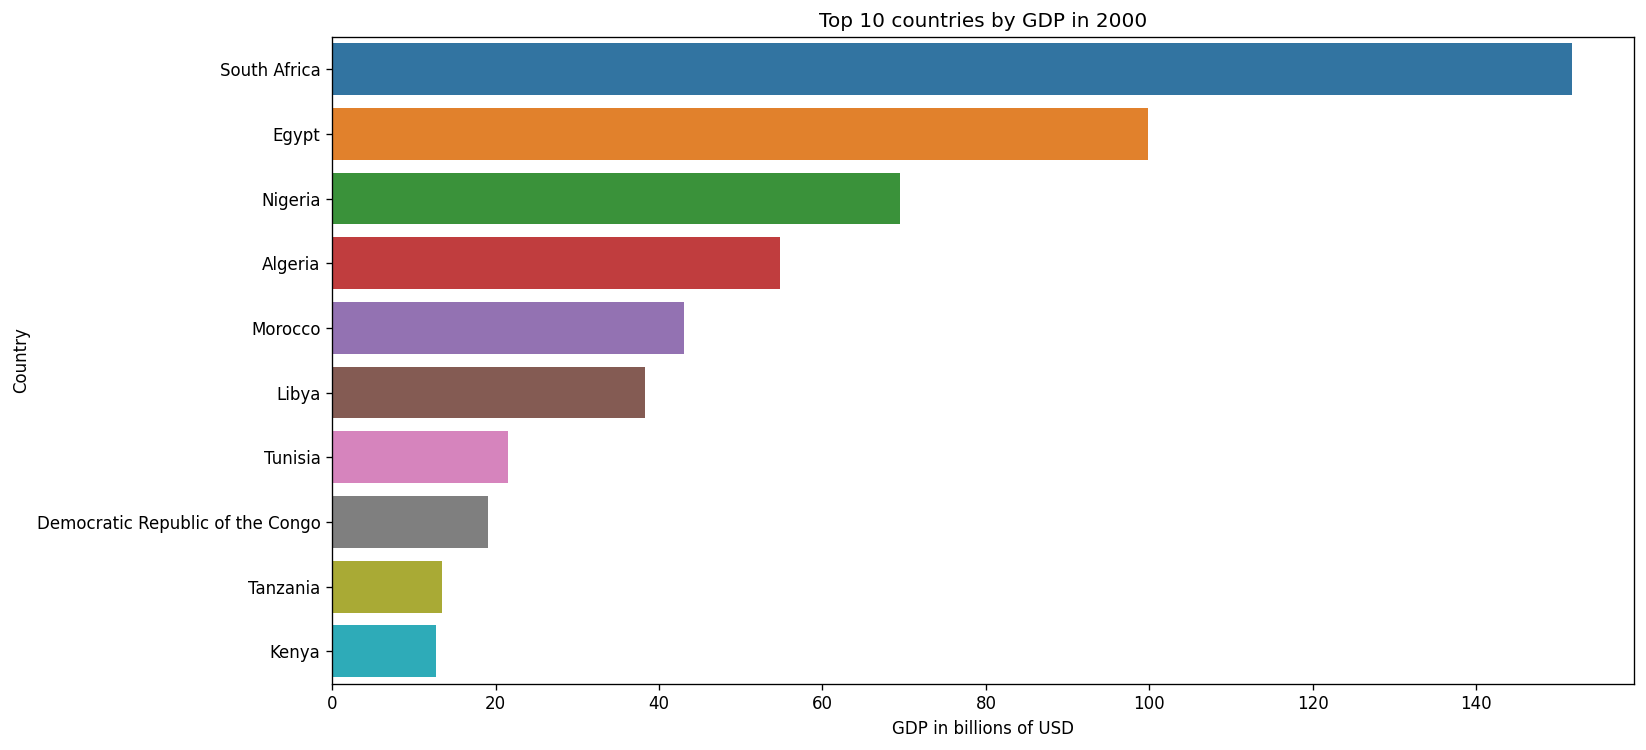

In [78]:
plt.figure(figsize=(14, 7), dpi=120)
fig = sns.barplot(data=data_2000.head(10),
                  y='Country',
                  x='gdp_billions',
                  orient='h')
plt.title("Top 10 countries by GDP in 2000")
plt.xlabel("GDP in billions of USD")
plt.show()

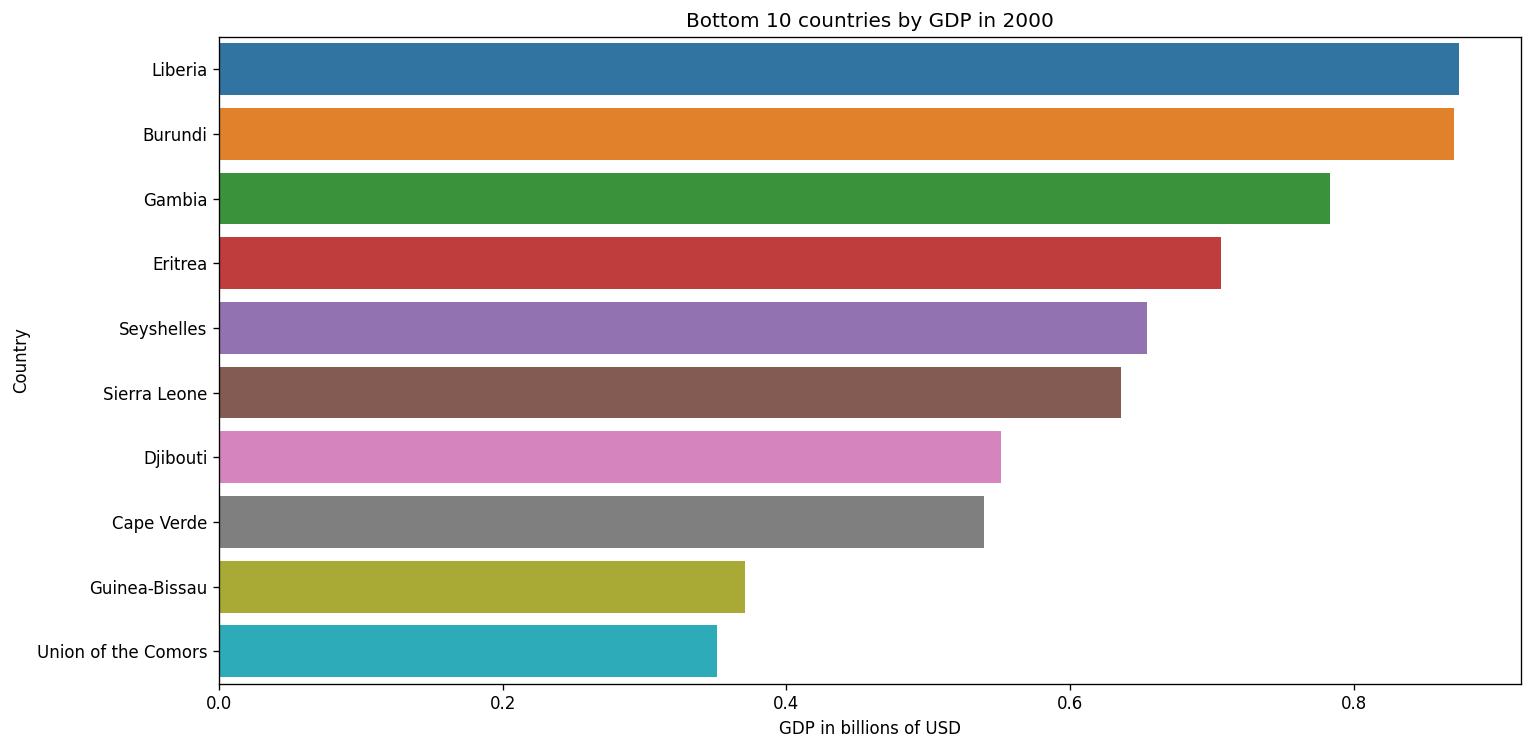

In [79]:
plt.figure(figsize=(14, 7), dpi=120)
fig = sns.barplot(data=data_2000.tail(10),
                  y='Country',
                  x='gdp_billions',
                  orient='h')
plt.title("Bottom 10 countries by GDP in 2000")
plt.xlabel("GDP in billions of USD")
plt.show()

In [87]:
data_2022 = data[data['Year'] == 2022]
data_2022 = data_2022.sort_values(by='gdp_billions', ascending=False)

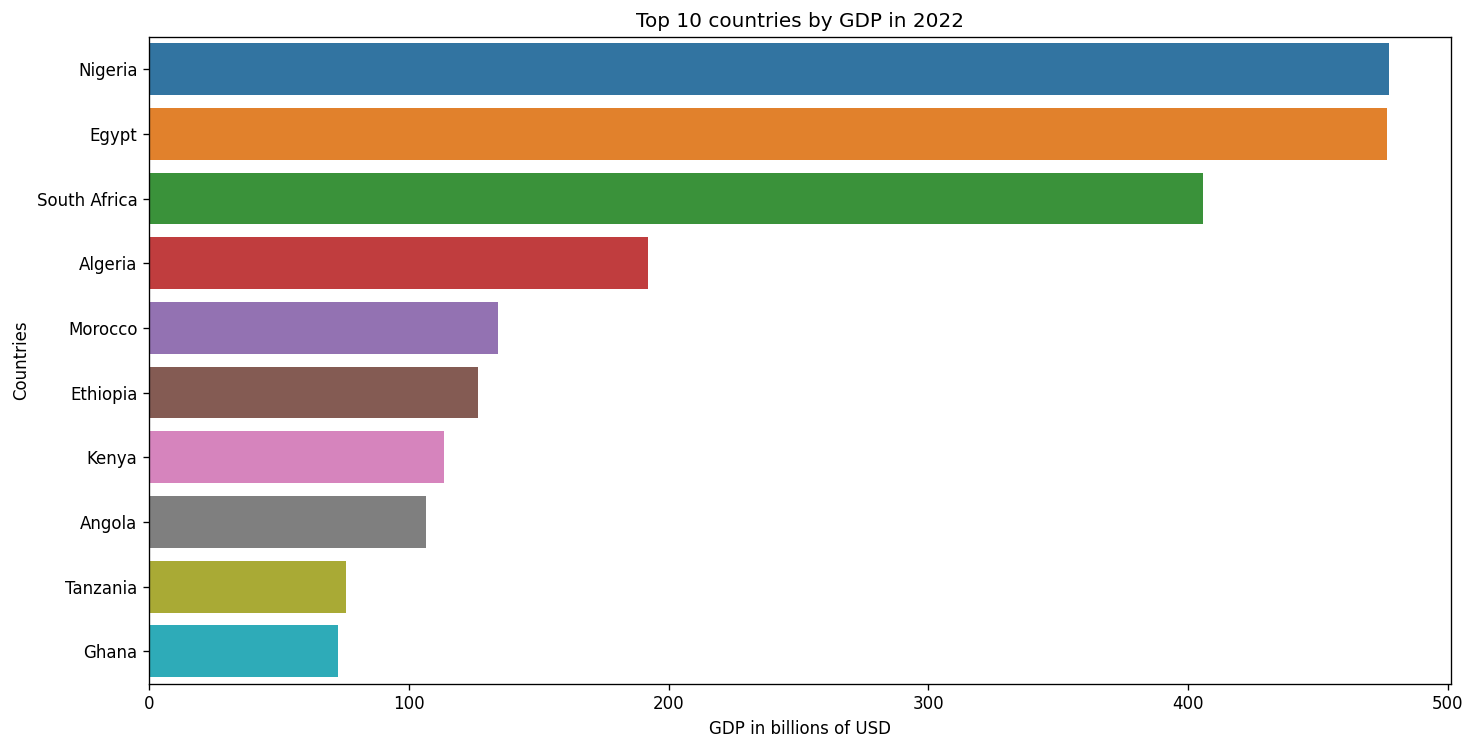

In [88]:
plt.figure(figsize=(14, 7), dpi=120)
fig =  sns.barplot(data=data_2022.head(10),
                   y='Country',
                   x='gdp_billions',
                   orient='h')
plt.title("Top 10 countries by GDP in 2022")
plt.xlabel('GDP in billions of USD')
plt.ylabel('Countries')
plt.show(fig)

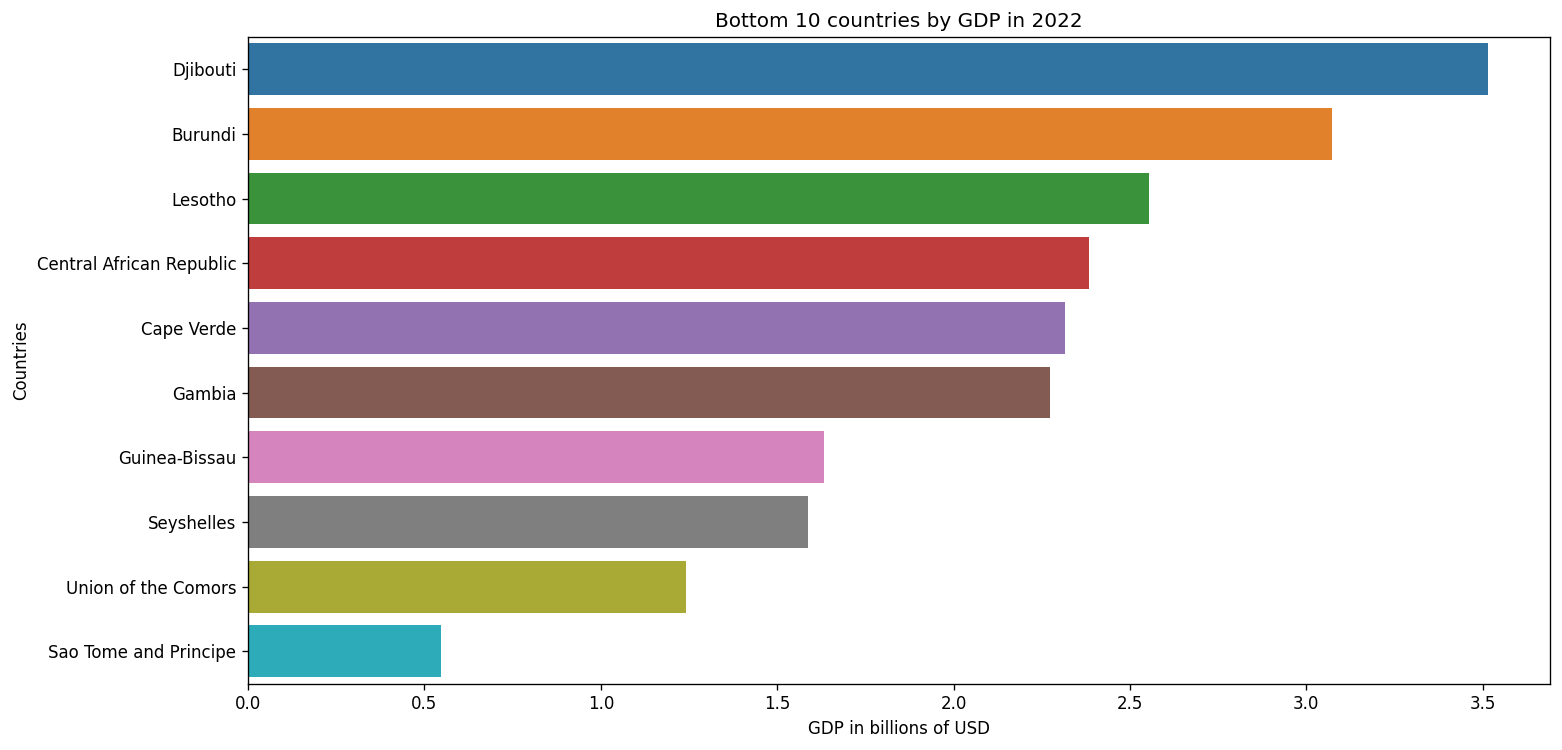

In [89]:
plt.figure(figsize=(14, 7), dpi=120)
fig =  sns.barplot(data=data_2022.tail(10),
                   y='Country',
                   x='gdp_billions',
                   orient='h')
plt.title("Bottom 10 countries by GDP in 2022")
plt.xlabel('GDP in billions of USD')
plt.ylabel('Countries')
plt.show(fig)

##### Visualizing the continent's areas by average GDP

In [90]:
area_data = data.groupby(['Continent', 'Year'], as_index=False).agg({'gdp_billions': pd.Series.mean})
area_data_2000 = area_data[area_data['Year'] == 2000]
area_data_2022 =  area_data[area_data['Year'] == 2022]

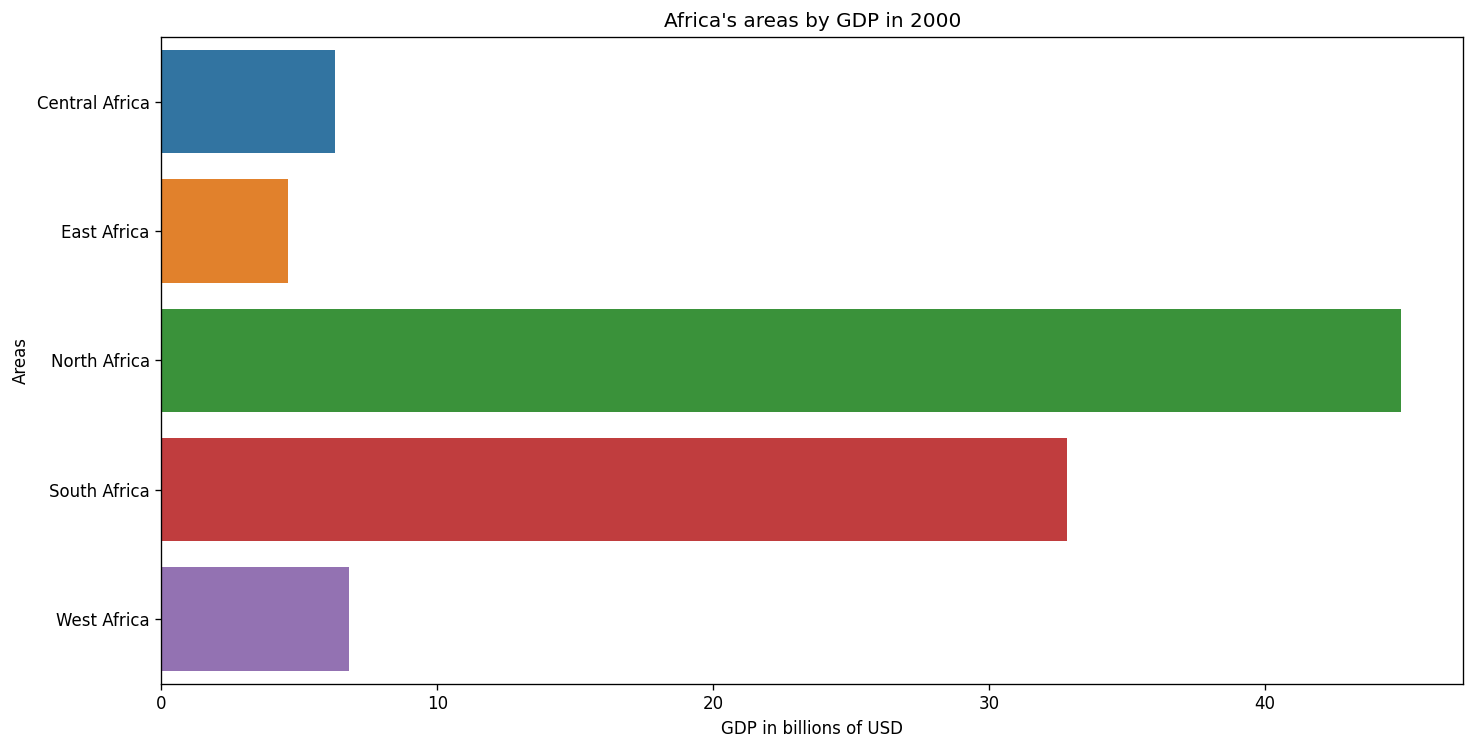

In [92]:
plt.figure(figsize=(14, 7), dpi=120)
fig =  sns.barplot(data=area_data_2000,
                   y='Continent',
                   x='gdp_billions',
                   orient='h')
plt.title("Africa's areas by GDP in 2000")
plt.xlabel('GDP in billions of USD')
plt.ylabel('Areas')
plt.show(fig)

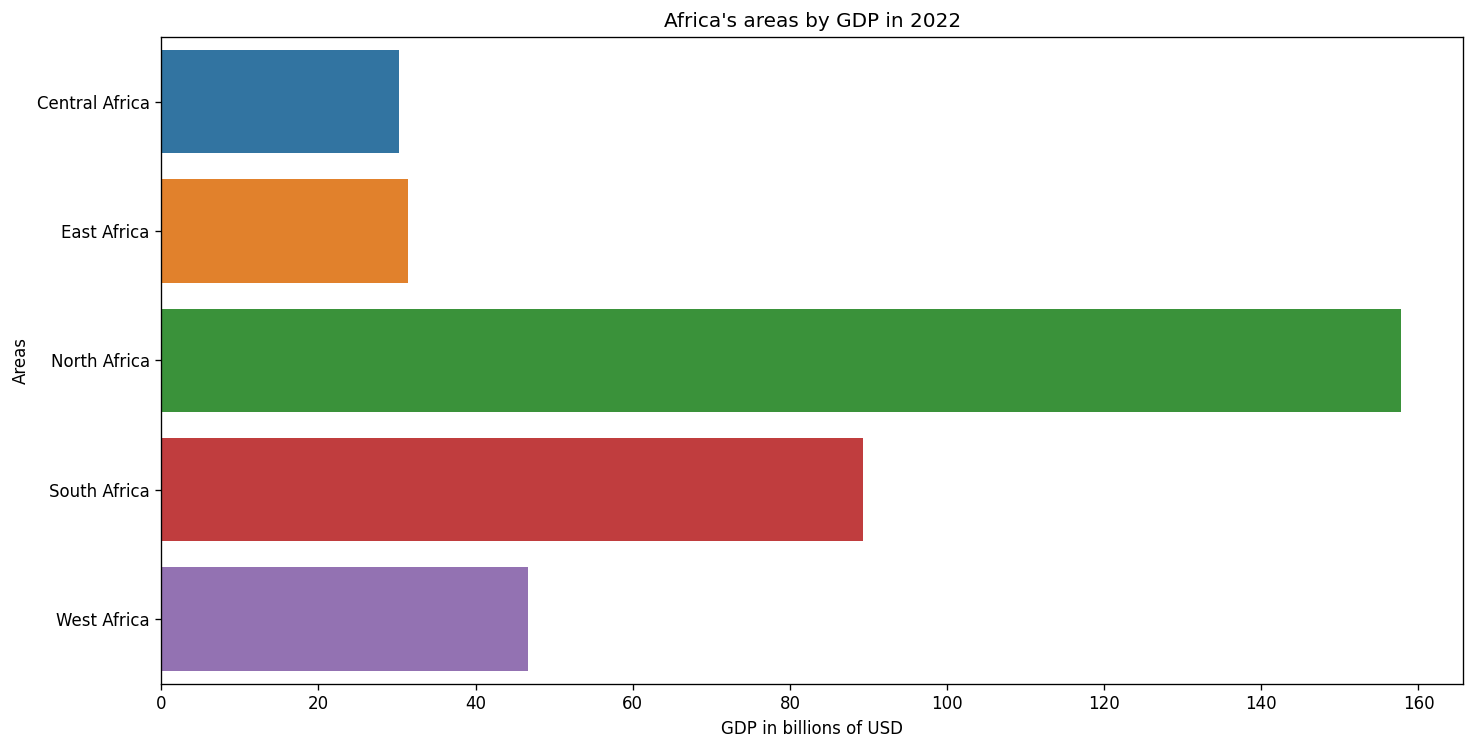

In [93]:
plt.figure(figsize=(14, 7), dpi=120)
fig =  sns.barplot(data=area_data_2022,
                   y='Continent',
                   x='gdp_billions',
                   orient='h')
plt.title("Africa's areas by GDP in 2022")
plt.xlabel('GDP in billions of USD')
plt.ylabel('Areas')
plt.show(fig)

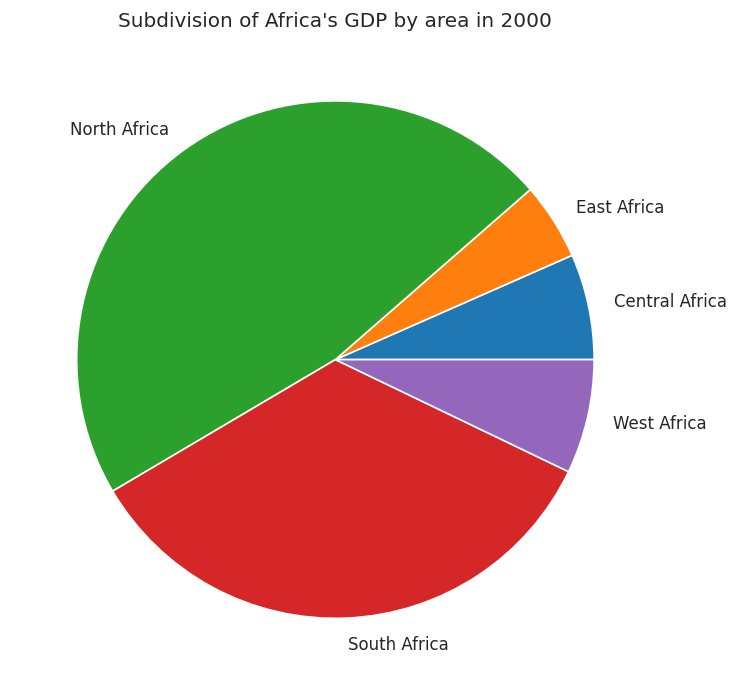

In [132]:
plt.figure(figsize=(14, 7), dpi=120)
fig = plt.pie(area_data_2000['gdp_billions'],
              labels=area_data_2000['Continent'])
plt.title("Subdivision of Africa's GDP by area in 2000")
plt.show()

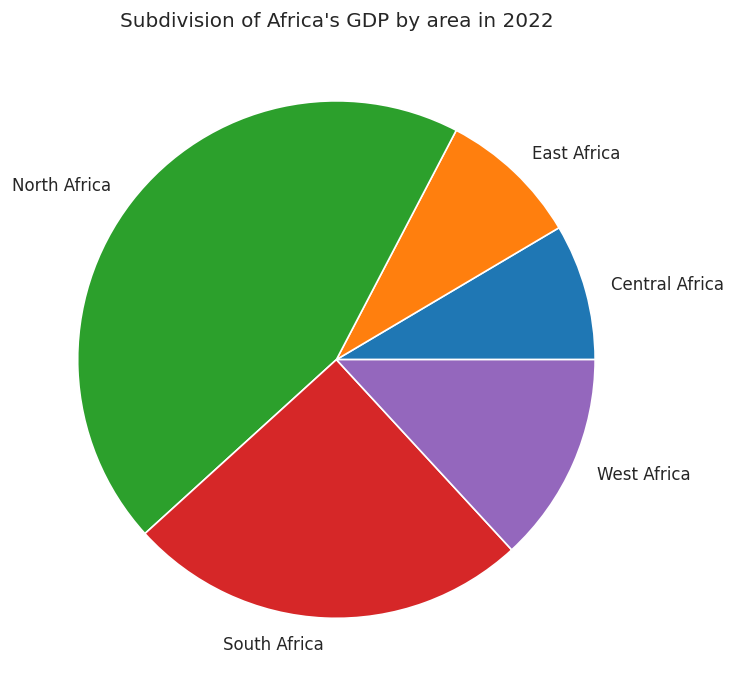

In [133]:
plt.figure(figsize=(14, 7), dpi=120)
fig = plt.pie(area_data_2022['gdp_billions'],
              labels=area_data_2022['Continent'])
plt.title("Subdivision of Africa's GDP by area in 2022")
plt.show()

#### Countries and areas through time

##### Countries' GDP through time

In [107]:
top10_2000 = list(data_2000.head(10)['Country'])
top10_2022 = list(data_2022.head(10)['Country'])
filtered_top_data = data[data['Country'].isin(top10_2000 or top10_2022)]

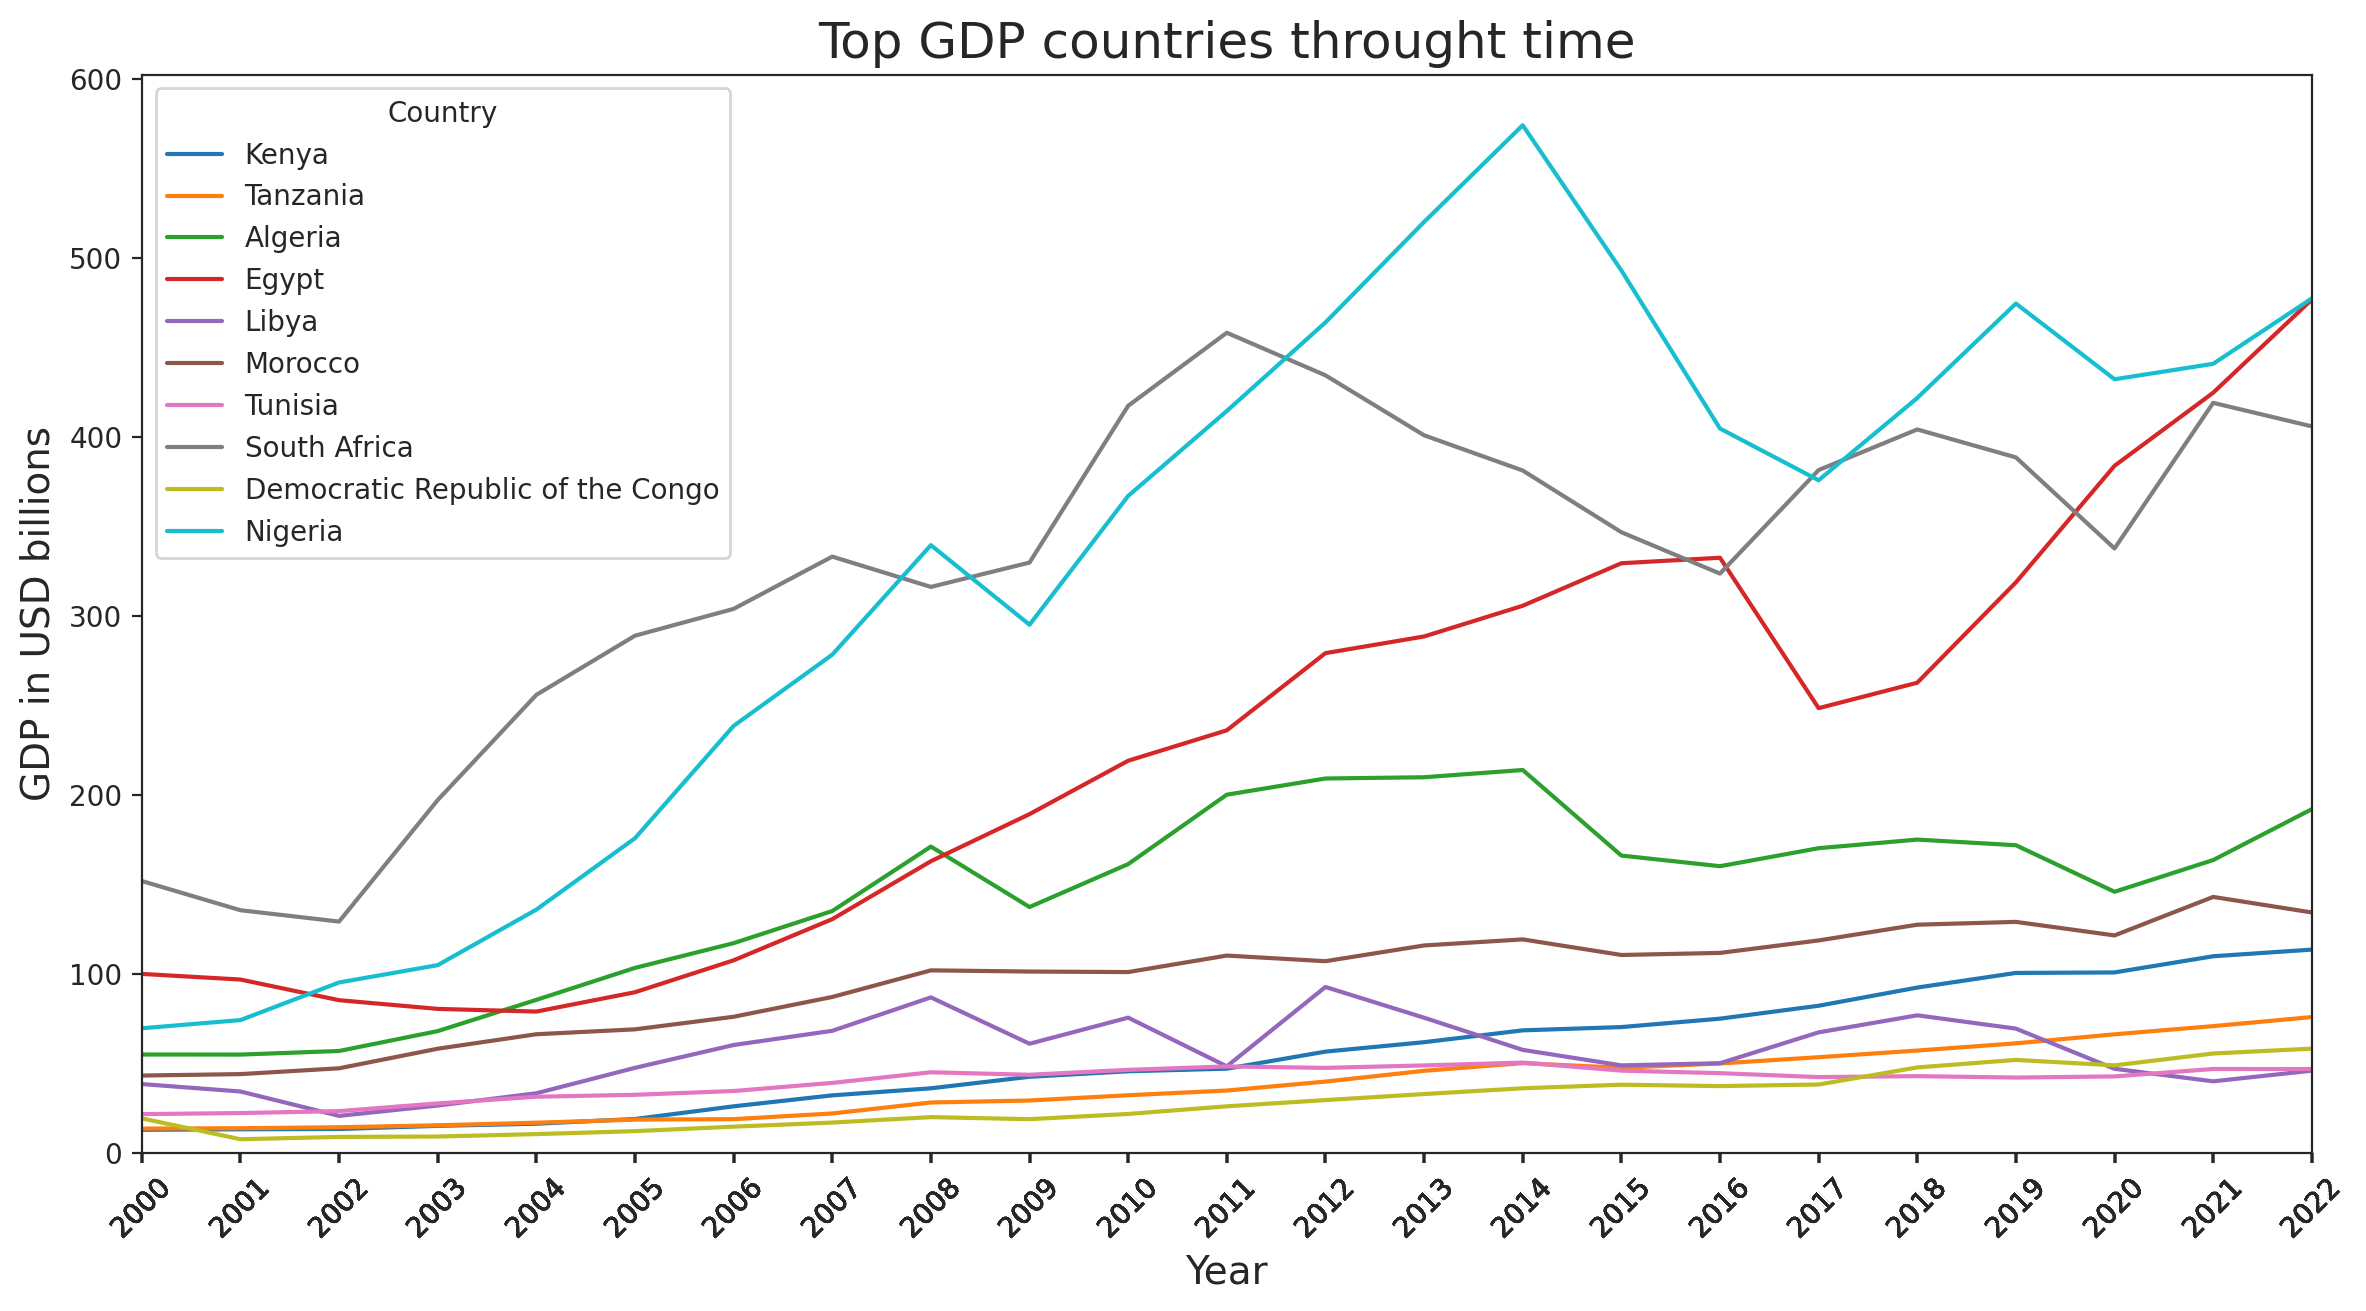

In [126]:
plt.figure(figsize=(14, 7), dpi=200)
sns.set_style('ticks')
fig = sns.lineplot(data=filtered_top_data,
                   x='Year',
                   y='gdp_billions',
                   hue='Country')
plt.xticks(filtered_top_data['Year'], rotation=45)
plt.title('Top GDP countries throught time', {'size': 18})
plt.xlabel('Year', {'size': 14})
plt.ylabel('GDP in USD billions', {'size': 14})
plt.xlim(filtered_top_data['Year'].min(), filtered_top_data['Year'].max())
plt.ylim(0,)
plt.show()

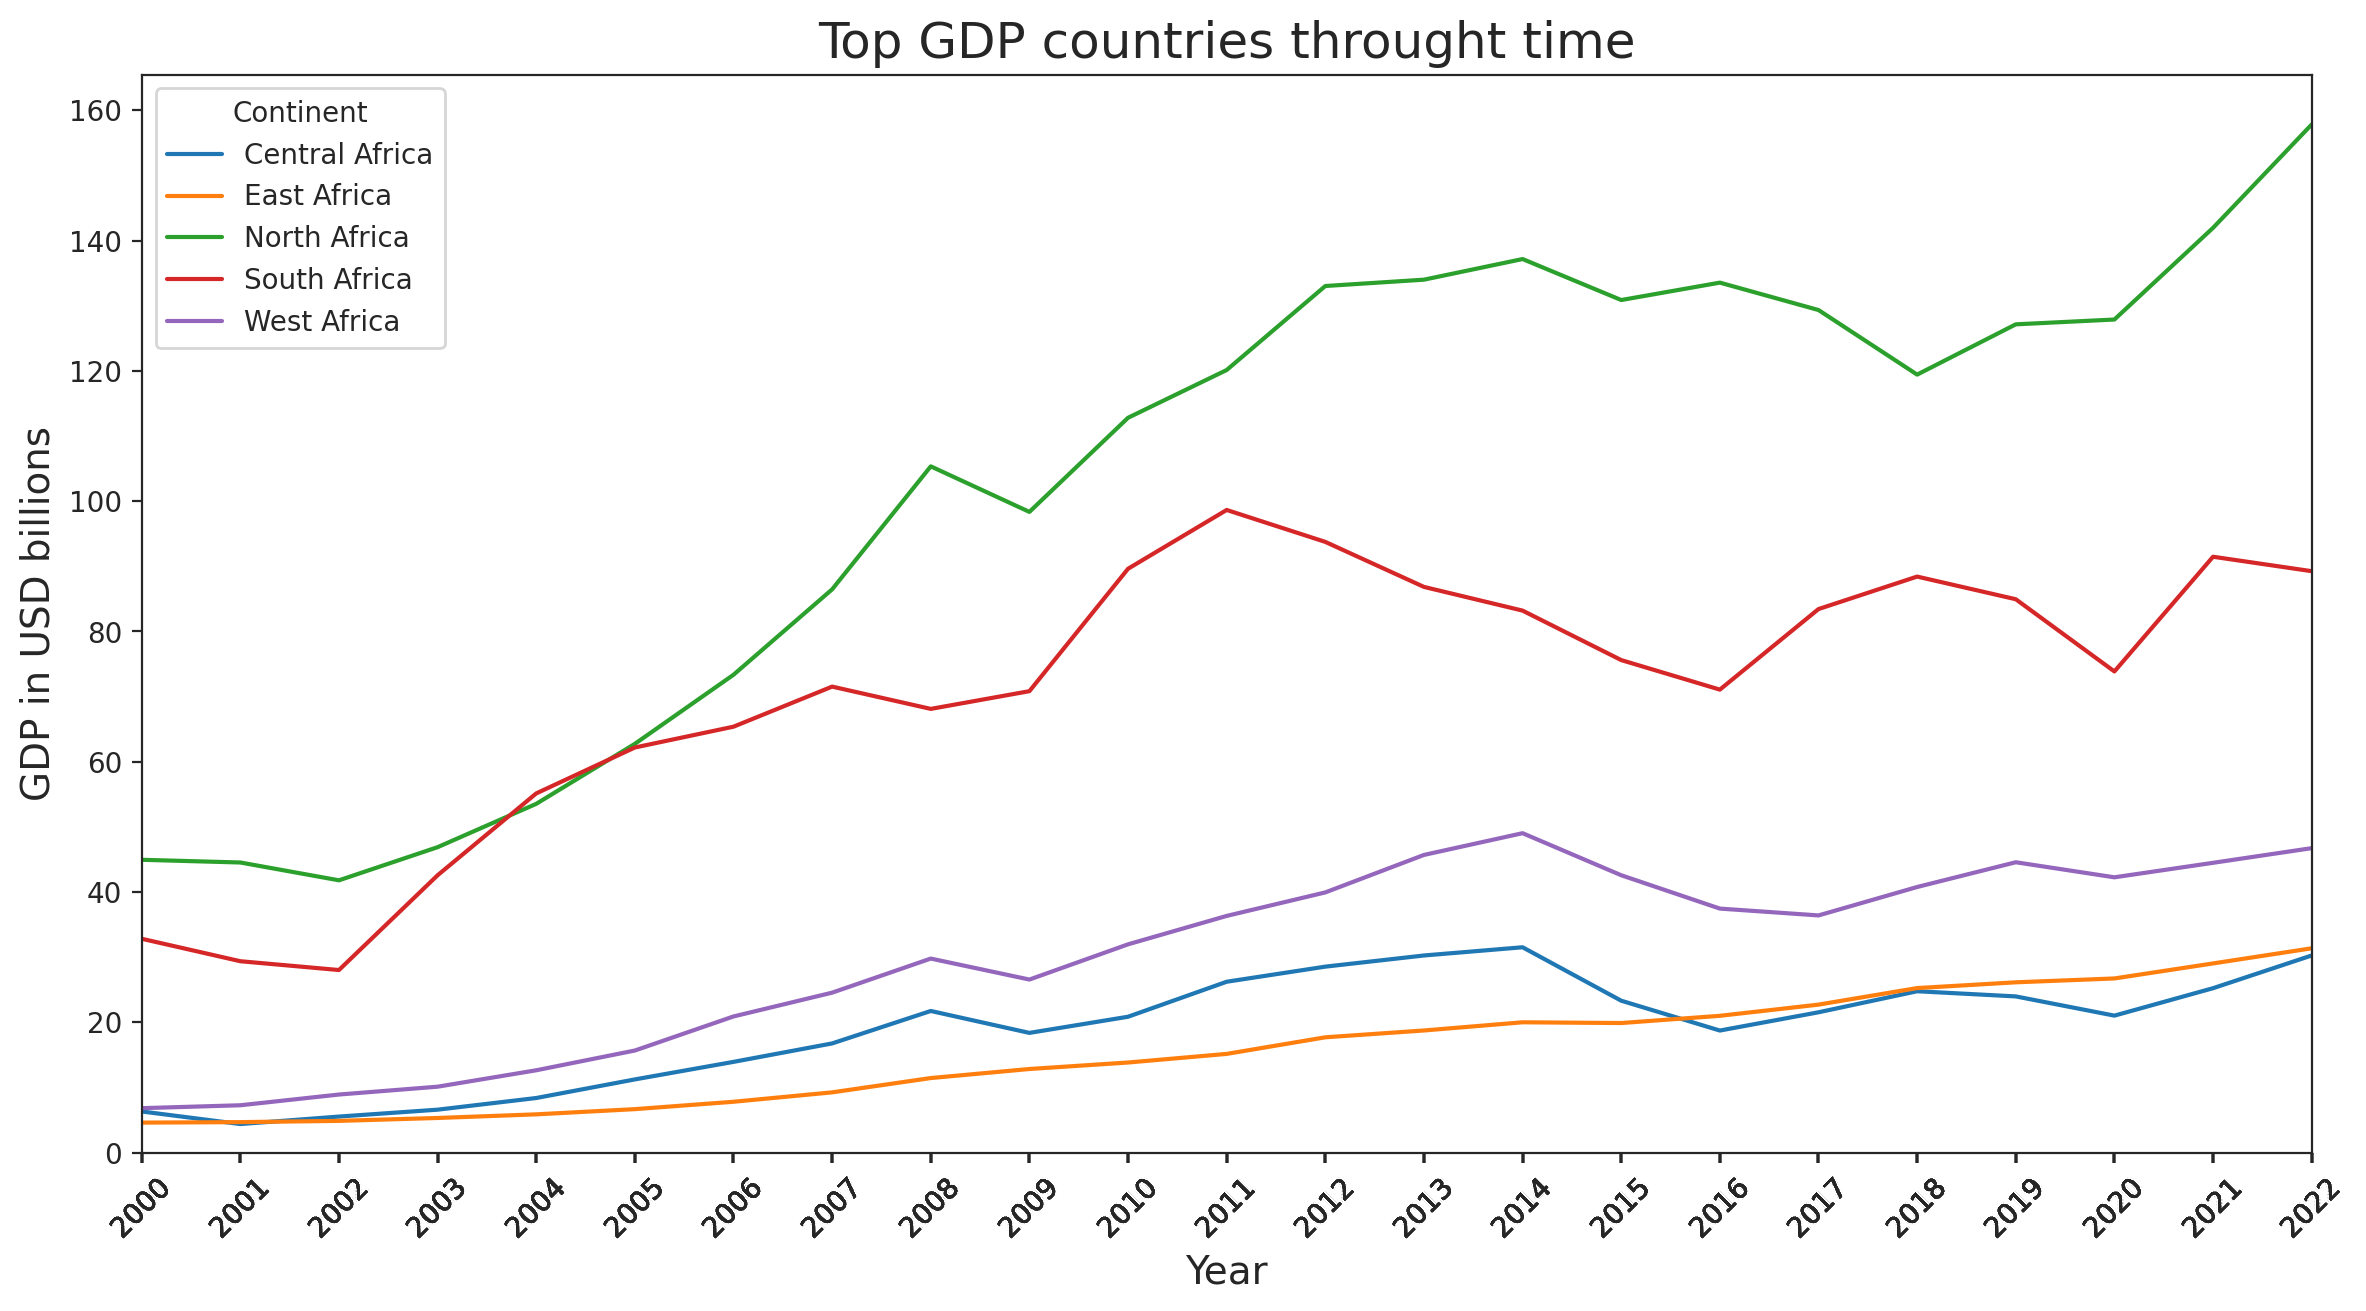

In [136]:
plt.figure(figsize=(14, 7), dpi=200)
sns.set_style('ticks')
fig = sns.lineplot(data=area_data,
                   x='Year',
                   y='gdp_billions',
                   hue='Continent')
plt.xticks(filtered_top_data['Year'], rotation=45)
plt.title('Top GDP countries throught time', {'size': 18})
plt.xlabel('Year', {'size': 14})
plt.ylabel('GDP in USD billions', {'size': 14})
plt.xlim(area_data['Year'].min(), area_data['Year'].max())
plt.ylim(0,)
plt.show()

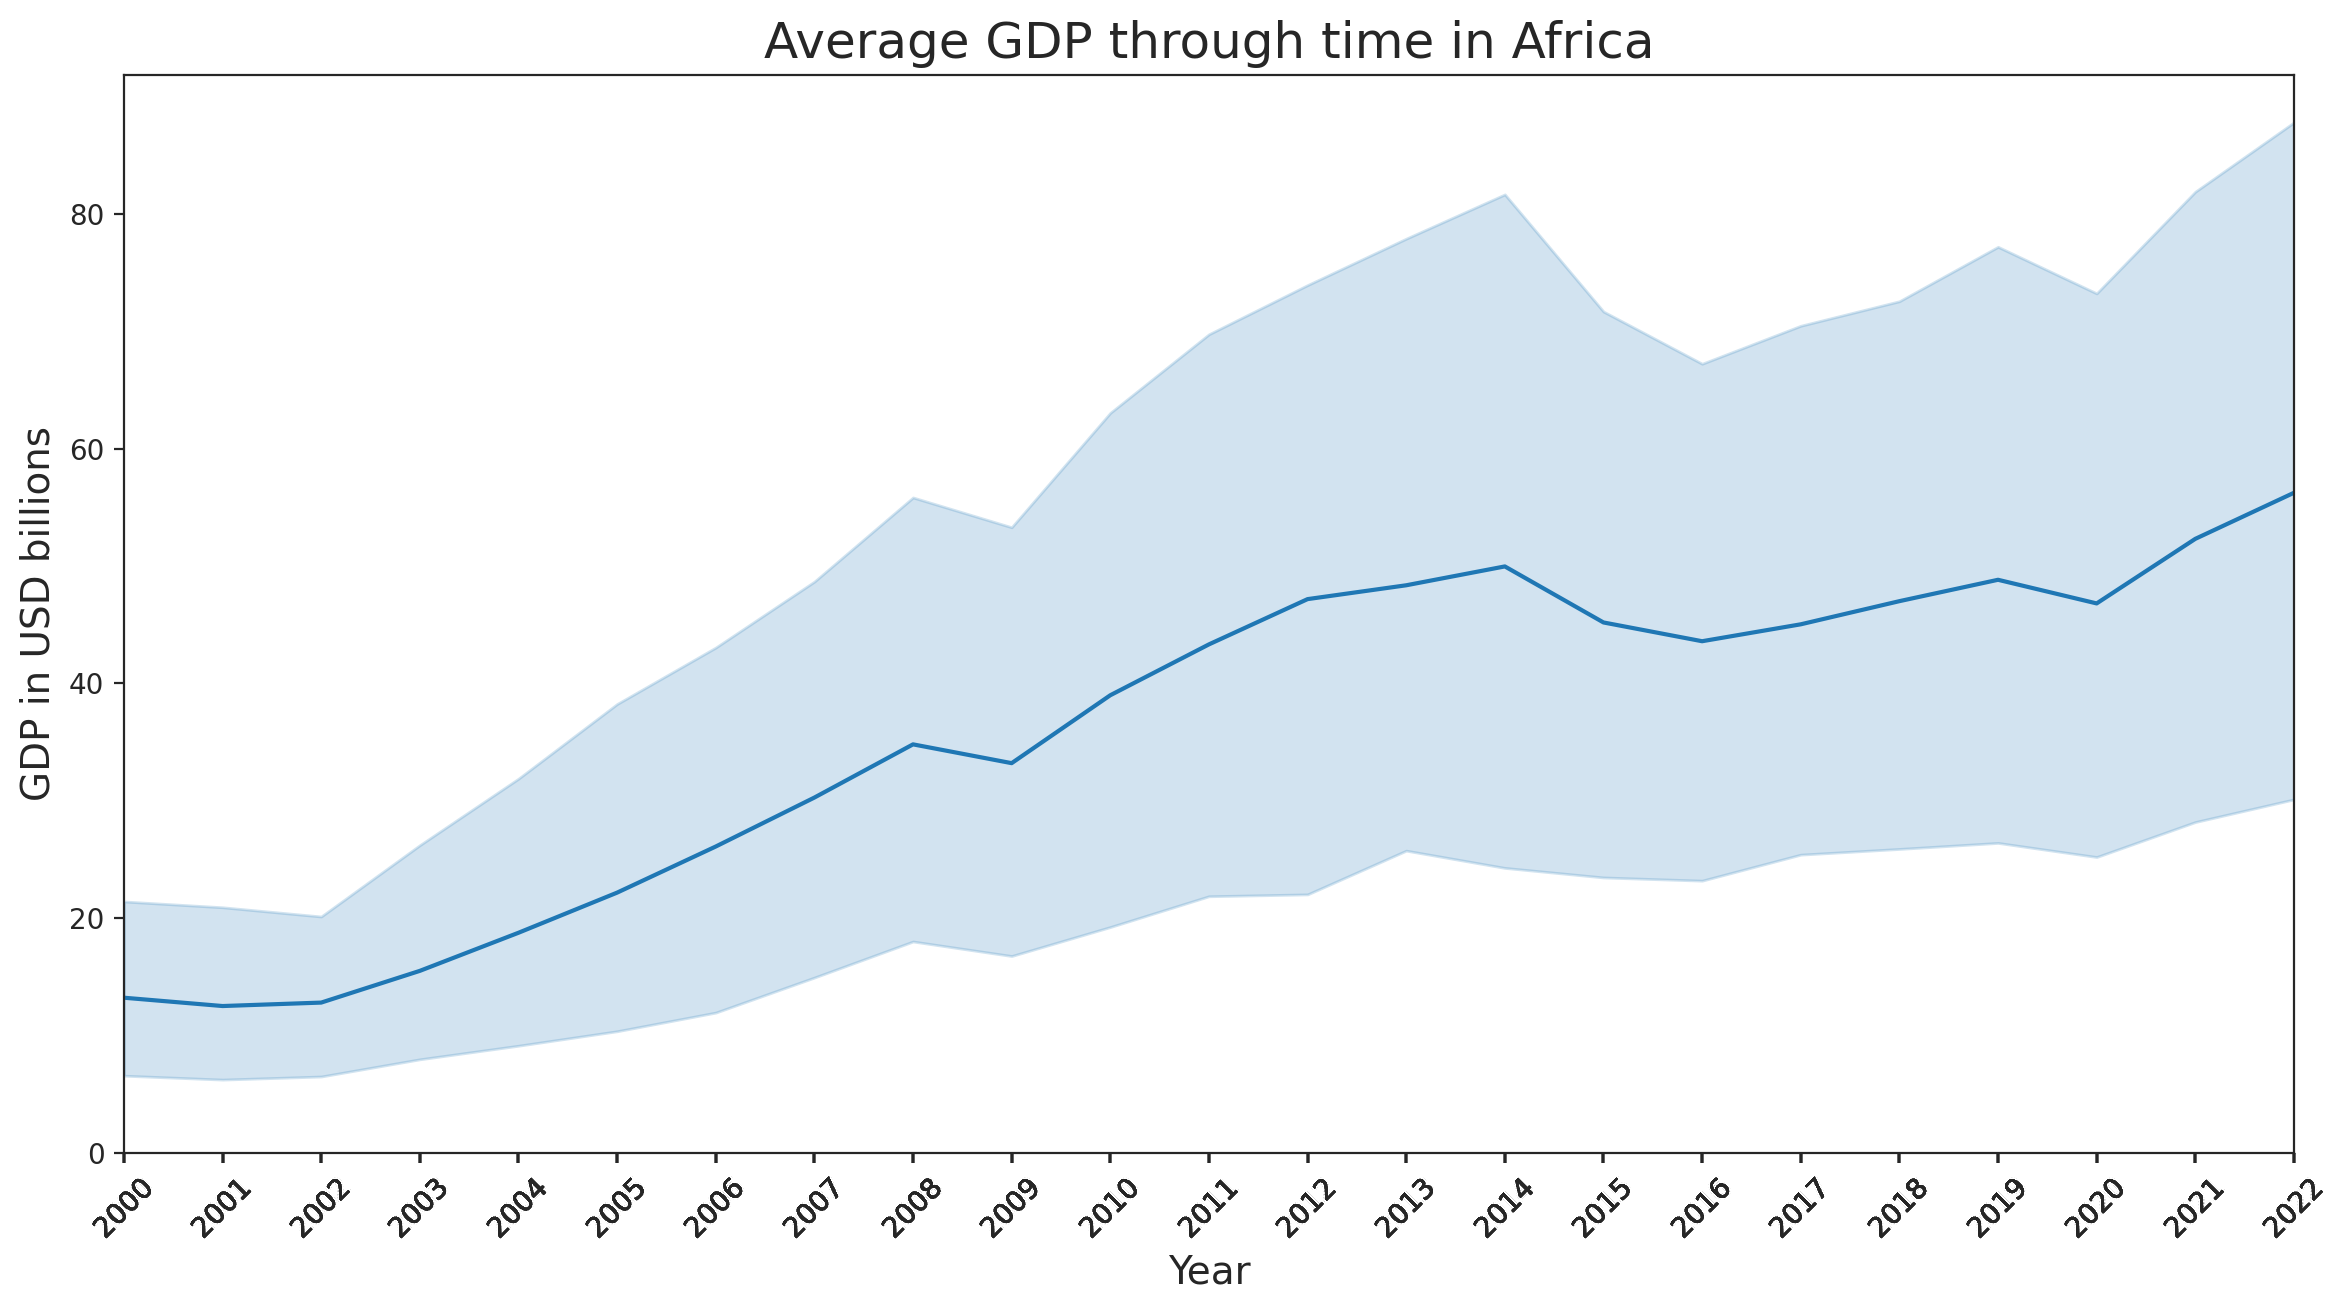

In [134]:
plt.figure(figsize=(14, 7), dpi=200)
sns.set_style('ticks')
fig = sns.lineplot(data=data,
                   x='Year',
                   y='gdp_billions')
plt.xticks(filtered_top_data['Year'], rotation=45)
plt.title('Average GDP through time in Africa', {'size': 18})
plt.xlabel('Year', {'size': 14})
plt.ylabel('GDP in USD billions', {'size': 14})
plt.xlim(filtered_top_data['Year'].min(), filtered_top_data['Year'].max())
plt.ylim(0,)
plt.show()

#### Visualizing data for each area of the continent

In [144]:
na_data = data[data['Continent'] == 'North Africa']
sa_data = data[data['Continent'] == 'South Africa']
ea_data = data[data['Continent'] == 'East Africa']
wa_data = data[data['Continent'] == 'West Africa']
ca_data = data[data['Continent'] == 'Central Africa']

In [145]:
na_data_2022 = na_data[na_data['Year'] == 2022]
sa_data_2022 = sa_data[sa_data['Year'] == 2022]
ea_data_2022 = ea_data[ea_data['Year'] == 2022]
wa_data_2022 = wa_data[wa_data['Year'] == 2022]
ca_data_2022 = ca_data[ca_data['Year'] == 2022]

In [171]:
na_data_2022 = na_data_2022.sort_values(by='gdp_billions', ascending=False)
sa_data_2022 = sa_data_2022.sort_values(by='gdp_billions', ascending=False)
ea_data_2022 = ea_data_2022.sort_values(by='gdp_billions', ascending=False)
wa_data_2022 = wa_data_2022.sort_values(by='gdp_billions', ascending=False)
ca_data_2022 = ca_data_2022.sort_values(by='gdp_billions', ascending=False)

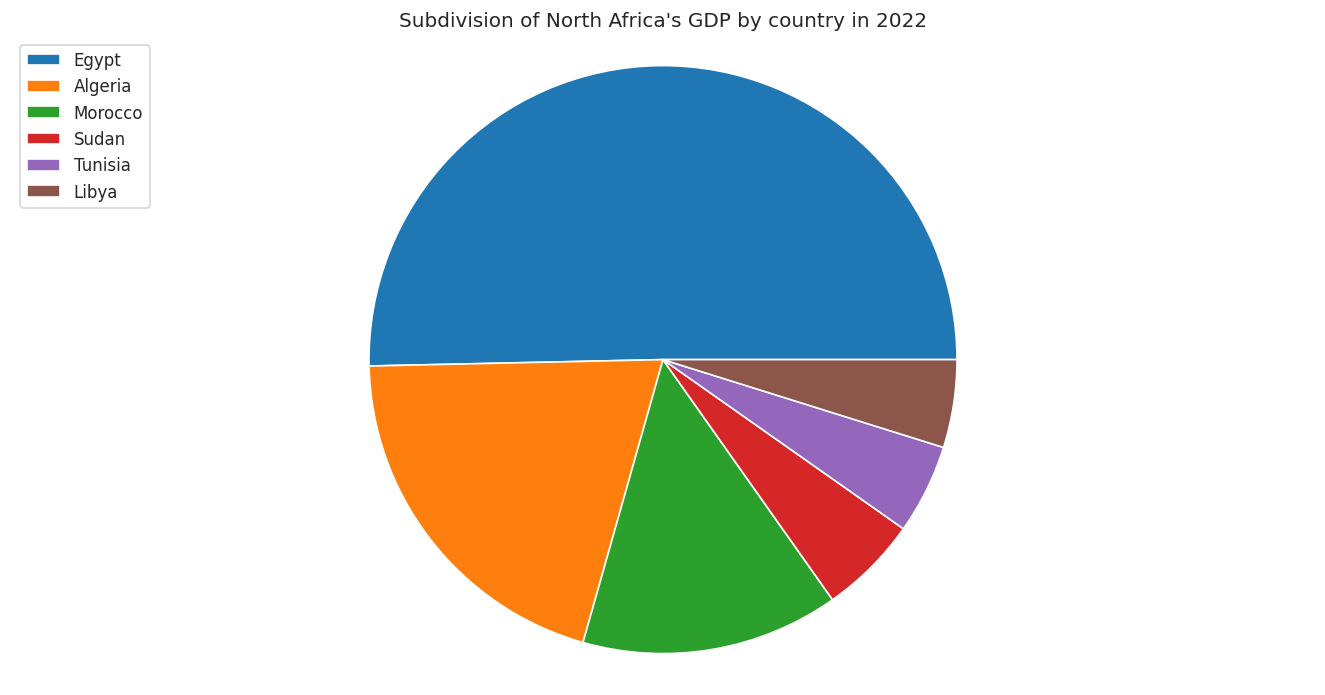

In [179]:
plt.figure(figsize=(14, 7), dpi=120)
fig = plt.pie(na_data_2022['gdp_billions'])
plt.title("Subdivision of North Africa's GDP by country in 2022")
plt.legend(na_data_2022['Country'], loc='upper left')
plt.axis('equal')
plt.show()

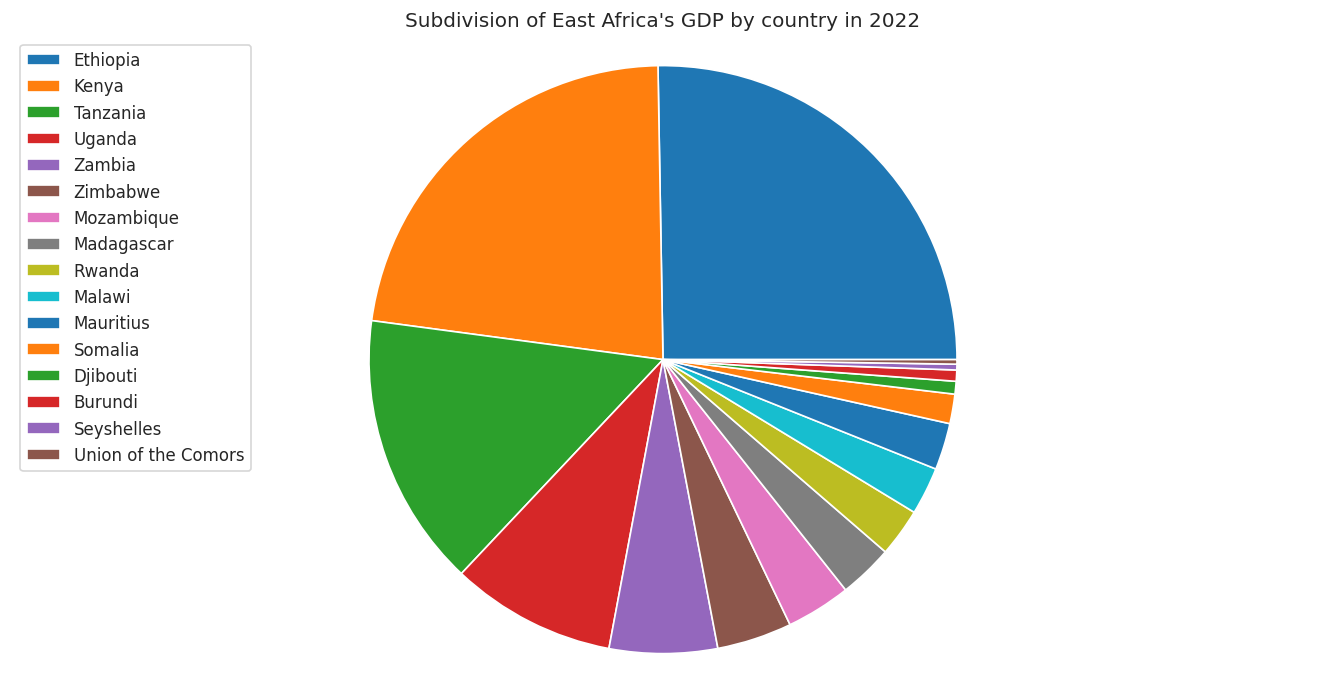

In [173]:
plt.figure(figsize=(14, 7), dpi=120)
fig = plt.pie(ea_data_2022['gdp_billions'])
plt.title("Subdivision of East Africa's GDP by country in 2022")
plt.legend(ea_data_2022['Country'], loc='upper left')
plt.axis('equal')
plt.show()

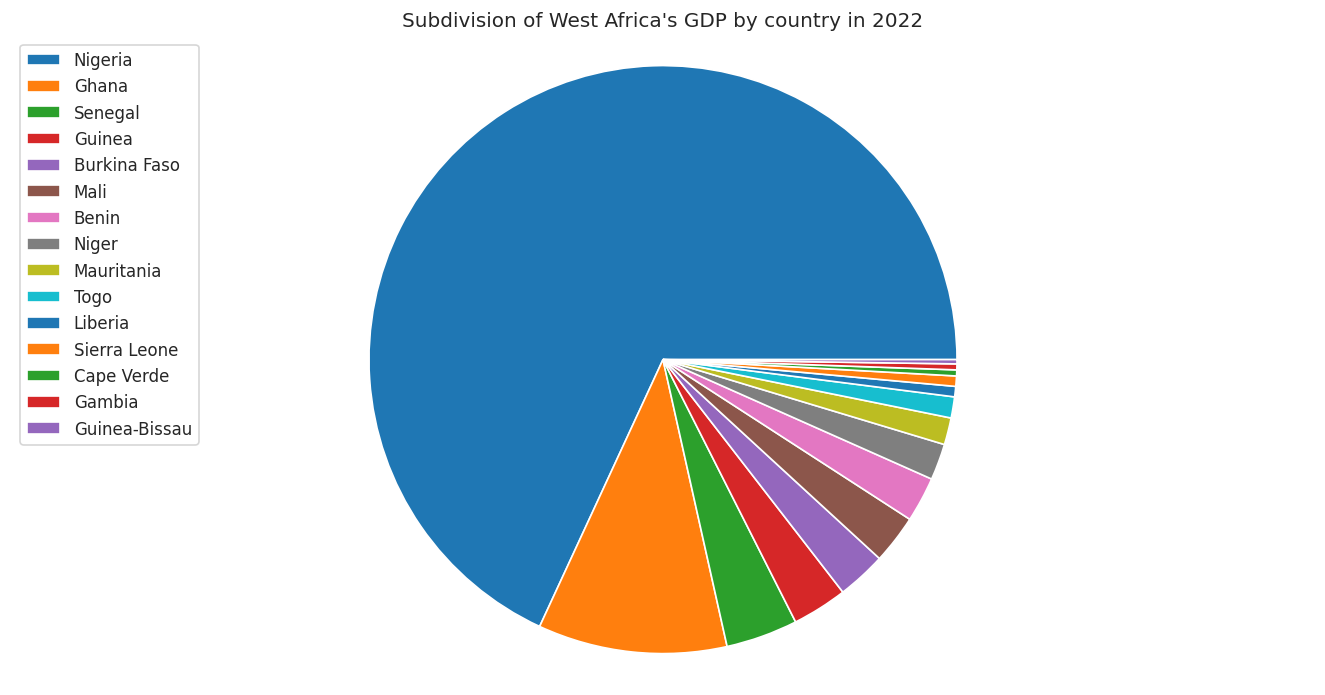

In [174]:
plt.figure(figsize=(14, 7), dpi=120)
fig = plt.pie(wa_data_2022['gdp_billions'])
plt.title("Subdivision of West Africa's GDP by country in 2022")
plt.legend(wa_data_2022['Country'], loc='upper left')
plt.axis('equal')
plt.show()

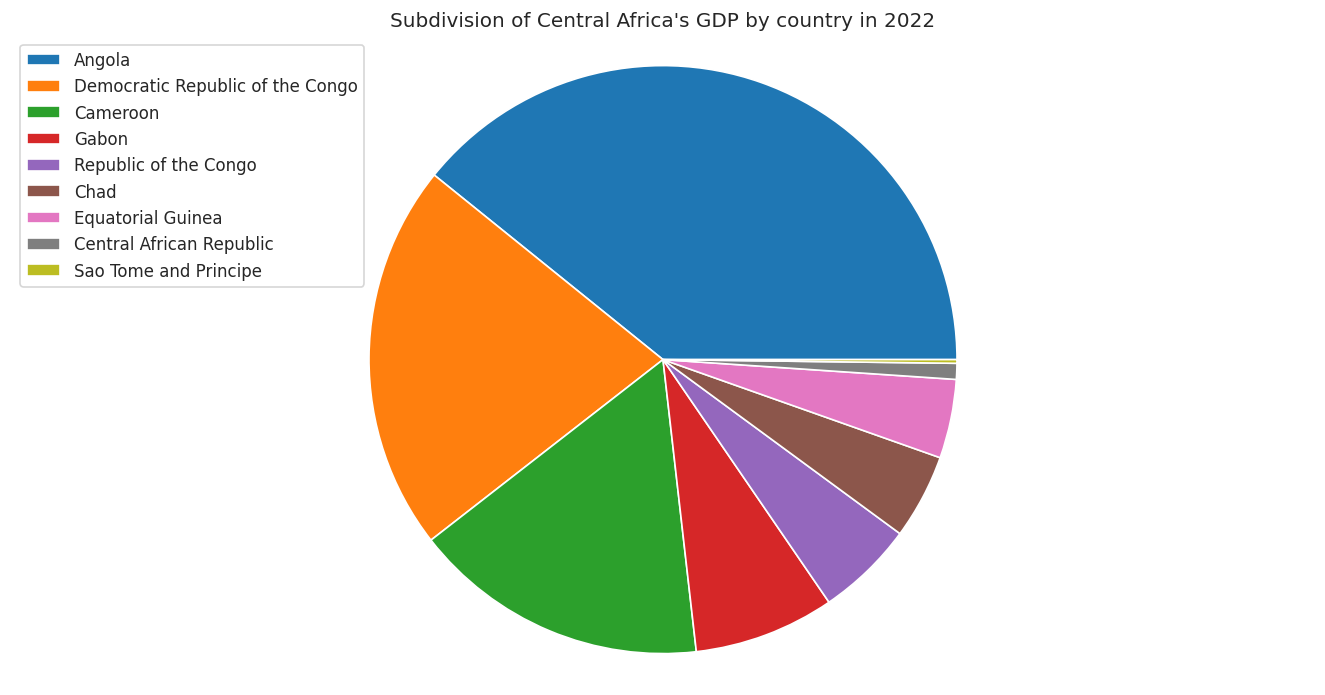

In [177]:
plt.figure(figsize=(14, 7), dpi=120)
fig = plt.pie(ca_data_2022['gdp_billions'])
plt.title("Subdivision of Central Africa's GDP by country in 2022")
plt.legend(ca_data_2022['Country'], loc='upper left')
plt.axis('equal')
plt.show()

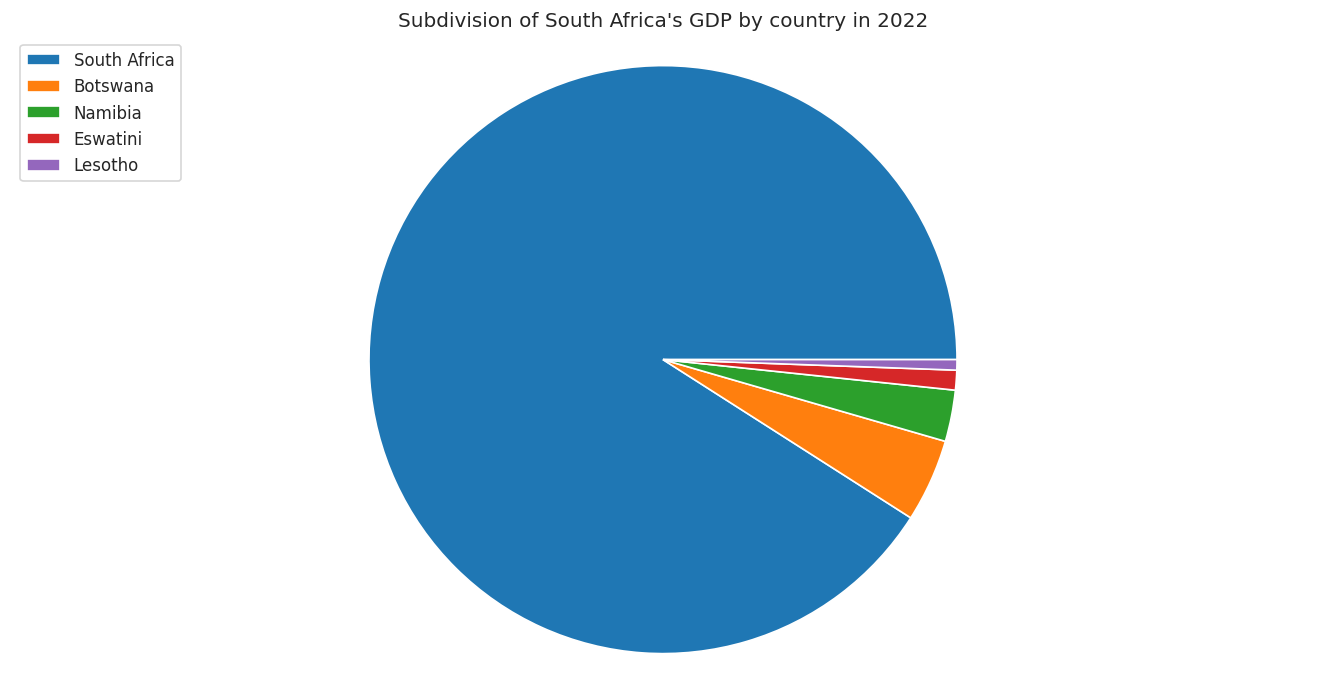

In [178]:
plt.figure(figsize=(14, 7), dpi=120)
fig = plt.pie(sa_data_2022['gdp_billions'])
plt.title("Subdivision of South Africa's GDP by country in 2022")
plt.legend(sa_data_2022['Country'], loc='upper left')
plt.axis('equal')
plt.show()

#### Visualizing GDP data on a map

In [210]:
fig = px.choropleth(data_2000,
                    locations='Country',
                    locationmode='country names',
                    color='gdp_billions',
                    hover_data=['Population '],
                    hover_name='Country',
                    width=800,
                    height=800)
fig.update_layout(title_text='GDP by country in 2000',
                  title_x=0.5,
                  geo_scope='africa',
                  coloraxis_colorbar_title_text = 'GDP')
fig.show()

In [200]:
fig = px.choropleth(data_2022,
                    locations='Country',
                    locationmode='country names',
                    color='gdp_billions',
                    hover_name='Country',
                    width=800,
                    height=800)
fig.update_layout(title_text = 'GDP by country in 2000',
                  title_x=0.5,
                  coloraxis_colorbar_title_text = 'GDP',
                  geo_scope='africa')
fig.show()